# A/B тестирование гипотез увеличения выручки интернет-магазина

**Цель исследования:** приоритизировать гипотезы увеличения выручки интернет-магазина, запустить A/B-тест и проанализировать результаты.

**Ход исследования:**
 1. Приоритизация гипотез.
 2. Анализ A/B-теста:
 - ознакомление с данными;
 - расчеты и добавление данных;
 - расчет статистической значимости;
 - решение по результатам теста.
 
**Источник данных:** данные интернет-магазина о покупках клиентов.

## Приоритизация гипотез.

Импортируем необходимые библиотеки

In [447]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Зададим формат отображения данных

In [448]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 120

In [449]:
font = {'family': 'DejaVu Sans',
        'color':  '#000080',
        'weight': 'normal',
        'size': 20,
        }
font_2 = {'family': 'DejaVu Sans',
        'color':  '#000000',
        'weight': 'normal',
        'size': 16,
        }

### Ознакомимся с гипотезами и оценками параметров

In [450]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [451]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


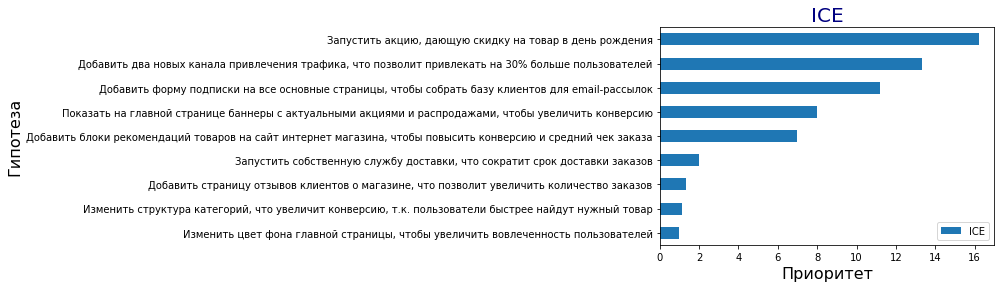

In [452]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет', fontdict=font_2)
ax.set_ylabel('Гипотеза', fontdict=font_2)
ax.set_title('ICE', fontdict=font)
plt.show()

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [453]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


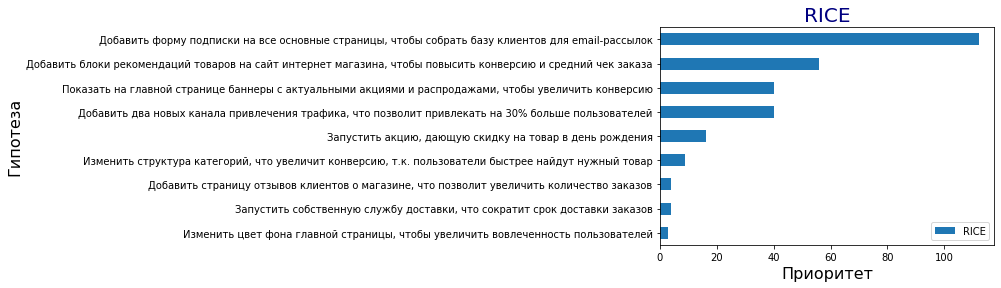

In [454]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет', fontdict=font_2)
ax.set_ylabel('Гипотеза', fontdict=font_2)
ax.set_title('RICE', fontdict=font)
plt.show()

### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

При применении параметра RICE вместо ICE приоритезация гипотз сильно изменилась, т.к. RICE учитывает количество пользователей, которых затронет реализация изменения. Гипотеза 7 с добавлением формы подписки на все страницы имеет максимальный охват пользователей и оценку Reach, равную 10, поэтому она вышла на первое место. Гипотеза 8 с запуском акции со скидкой на день рождения пользователй при оценке по RICE с первого места опустилась на 5, т.к. затрагивает минимальное количство пользователей, ее параметр Reach равен 1.

### Вывод

Для проведения A/B-теста выбираем гипотезу 7 с добавлением формы подписки на все страницы, т.к. у нее максимальная оценка по RICE, она превышает оценку следующей гипотезы в 2 раза. По ICE приоритет данной гипотезы так же высокий и занимает 3 позицию.

## Анализ A/B-теста

### Ознакомимся с данными, полученными в процессе  A/B-теста

In [455]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [456]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [457]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [458]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [459]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### В обеих таблицах даты нужно привести к верному формату

In [460]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [461]:
orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId'}, inplace=True)

#### Проверим данные на дубликаты

In [462]:
orders.duplicated().sum()

0

In [463]:
visitors.duplicated().sum()

0

В данных нет дубликатов.

### Изучим данные, полученные во время проведения A/B-теста

#### Сколько групп в A/B-тесте

In [464]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В тесте 2 группы

#### Даты начала и окончания теста

In [465]:
start_date = orders['date'].min().date()
print('Дата начала теста', start_date)
print()
finish_date = orders['date'].max().date()
print('Дата окончания теста', finish_date)

Дата начала теста 2019-08-01

Дата окончания теста 2019-08-31


#### Сколько пользователей в каждой группе

In [466]:
orders.groupby('group')['userId'].nunique()

group
A    503
B    586
Name: userId, dtype: int64

### Расчеты и добавление данных

#### Рассчитаем выручку по дням для обеих групп

In [467]:
datesGroups = orders[['date','group']].drop_duplicates() #cоздаlbv датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

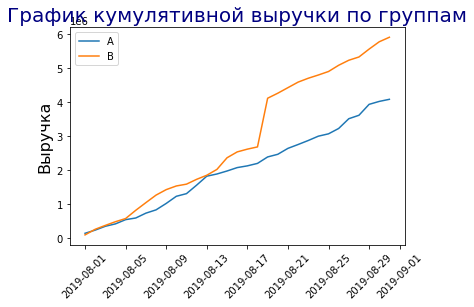

In [468]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', fontdict=font)
plt.ylabel("Выручка", fontdict=font_2)
plt.xticks(rotation=45)
plt.legend()
plt.show();

**Вывод:** сегмент B лидировал начиная с первых дней исследования, в один из дней выручка в обоих сегментах сравнялась, но в середине теста сегмент B резко подскочил вверх и оставался на более высоком уровне оставшийся отрезок времени. Возможно, в середине теста в сегменте B были аномально большие заказы. Сегмент А растет линейно.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

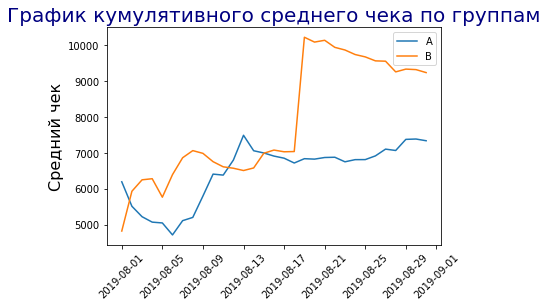

In [469]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', fontdict=font)
plt.ylabel("Средний чек", fontdict=font_2)
plt.xticks(rotation=45)
plt.legend()
plt.show();

**Вывод:** средний чек в группе B сильно подскакивает в середине исследования, после чего незначительно снижается в оставшийся отрезок времени. Вероятно, в этот день были аномально большие заказы. Средний чек в группе A подвержен колебаниям, также есть резкие скачки вверх и вниз, но они менее выражены, чем в группе B.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

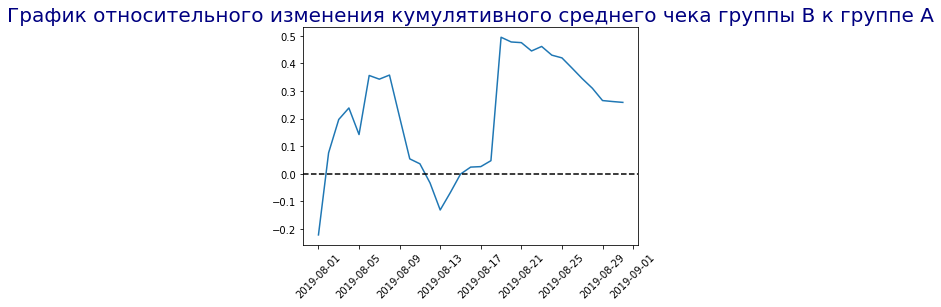

In [470]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontdict=font)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show();

**Вывод**: отношение среднего чека группы B к среднему чеку группы А резко меняется в несколько дат, видимо, в эти даты были аномальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

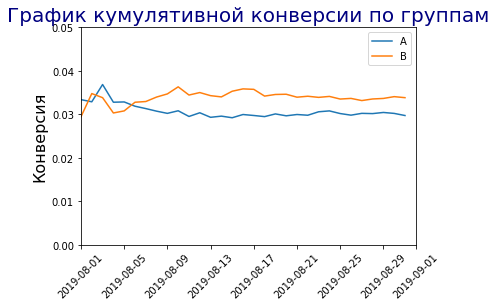

In [471]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.title('График кумулятивной конверсии по группам', fontdict=font)
plt.ylabel("Конверсия", fontdict=font_2)
plt.xticks(rotation=45)
plt.show();

**Вывод:** на протяжении первых дней теста сегмент A имел более высокую конверсию (за исключением одного дня). Однако приблизительно на шестой день теста конверсия сегмента B превысила консверсию сегмента A и зафиксировалась около одного значения. Конверсия сегмента A зеркально снизилась и так же зафиксировалась около одного значения.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

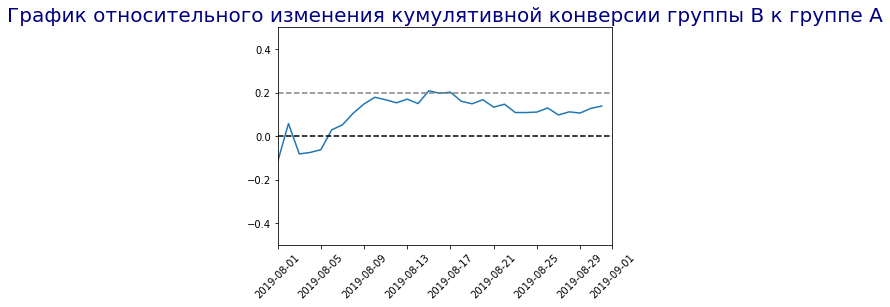

In [472]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontdict=font)
plt.xticks(rotation=45)
plt.show();

**Вывод:** сегмент B лидирует по конверсии, самый лучший показатель был в середине исследования, прирост по отношению к группе A  составил около 20%, после чего произошло незначительное снижение.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

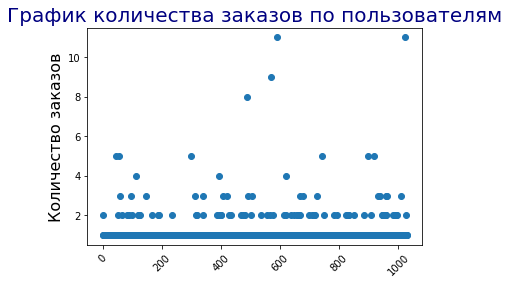

In [473]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям', fontdict=font)
plt.ylabel("Количество заказов", fontdict=font_2)
plt.xticks(rotation=45)
plt.show();

**Вывод:** много пользователей совершили 1-3 заказа. Есть несколько пользователей, совершивших более 8 заказов

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [474]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))
order_count_anomal = np.percentile(ordersByUsers['orders'], 95).round()
print(order_count_anomal)

[2. 4.]
2.0


**Вывод:** не более 5% пользователей оформили больше, чем 2 заказа. Всего 1% пользователей оформил больше 4 заказов. Установим границу аномального количества заказов на одного клиента на уровне 95 перцентиля.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

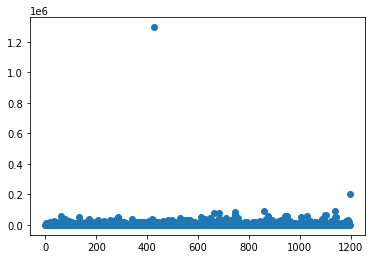

In [475]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']); 

На графике видно, что сумма большинства заказов не превышает 50 000, однако из-за одного аномально большого заказа стоимостью свыше 1 000 000 рублей более точно определить границы аномальных и нормальных заказов по графику затруднительно. Попробум постоить графк, исключив этот заказ.

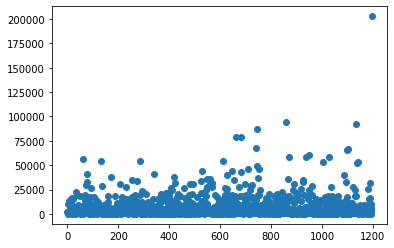

In [476]:
orders_2 = orders.query('revenue < 300000')
x_values = pd.Series(range(0,len(orders_2['revenue'])))
plt.scatter(x_values, orders_2['revenue']);

**Вывод:** на графике, построенном без учета аномально большого заказа, видно, что большинство заказов не превышали 25 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [477]:
print(np.percentile(orders['revenue'], [95, 99]))
order_sum_anomal = np.percentile(orders['revenue'], 95).round()
print(order_sum_anomal)

[28000.  58233.2]
28000.0


**Вывод:** не более 5% заказов дороже 28 000 рублей, и не более 1% дороже 58 233 рублей. Установим границу стоимости аномальных заказов на уровне 95 перцентиля.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

#### Сформулируем гипотезы

- H0: различий в среднем количестве заказов на пользователя между группами нет.
- H1: различия в среднем количестве заказов на пользователя между группами есть.

Для проверки выборок применим критерий Манна-Уитни.

In [478]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [479]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [480]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [481]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [482]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B к группе A:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост конверсии группы B к группе A: 0.138


P-value равен 0,017, что меньше 0,05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных показывает, что в среднем количестве заказов на пользователя между группами есть статитстически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

#### Сформулируем гипотезы

- H0: различий в среднем чеке между группами нет.
- H1: различия в среднем чеке группами есть.

Для проверки выборок применим критерий Манна-Уитни.

In [483]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к группе A:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительный прирост среднего чека группы B к группе A: 0.259


**Вывод**: P-value значительно больше 0.05. Нулевую гипотезу не отвергаем, различий в среднем чеке нет. При этом средний чек группы B на 25,9% больше среднего чека группы А. Вероятно, проблема в выбросах. Далее проверим гипотезы, исключив выбросы.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

#### Сделаем срез аномальных пользователей и рассмотрим его

Выберем границей аномального покупательского поведения пользователей 95 перцентиль как по количеству заказов, так и по размеру чека. В этом случае к аномальным пользователям относятся те, кто совершил больше 2 покупок и покупки на сумму более 28 000 руб.

In [484]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_count_anomal]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_count_anomal]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > order_sum_anomal]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64
74


Всего в тест попало 74 аномальных пользователя. Посчитаем статистическую значимость по очищенным данным.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Сформулируем гипотезы:

- H0: различий в среднем количестве заказов на пользователя между группами нет.
- H1: различия в среднем количестве заказов на пользователя между группами есть.

Подготовим выборки количества заказов по пользователям по группам теста:

In [485]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [486]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B к группе A:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.013
Относительный прирост конверсии группы B к группе A: 0.173


Результаты расчета статистической значимости на выборках без выбросов более явно показали различия между групами. P-value уменьшился с 0,017 до 0,013. А прирост средней конверсии группы B к конверсии группы A увеличился с 13,8% до 17,3%. Вероятно, наличие большого количества пользователей с аномальным количеством заказов в группе А искажало результаты проверки по сырым данным.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

- H0: различий в среднем чеке между группами нет.
- H1: различия в среднем чеке группами есть.

Для проверки выборок применим критерий Манна-Уитни.

In [487]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B к группе A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.738
Относительный прирост среднего чека группы B к группе A: -0.020


Результаты расчета статистической значимости различий в среднем чеке заказа между группами без выбросов подтвердили предположение о наличии в выборке A большого количества аномально крупных заказов. Исключив эти заказы получаем результат: P-value практически не изменился и составил 0,738 - нулевую гипотезу не отвергаем, различий в среднем чкеке между группами практически нет. При этом средний чек группы A на 2% меньше среднего чека группы B.

### Примем решение по результатам теста

#### Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.

#### Данные для принятия решения:

- есть статистически значимое различие по среднему количеству заказов на пользователей как по сырым данным, так и по очищенным от аномалий. Прирост средней конверсии группы B к конверсии группы A составляет 17,3%;


- статистически значимых различий в среднем чеке между группами нет;


- согласно графику различия конверсии сегмент B лидирует по конверсии, самый лучший показатель был в середине исследования, прирост по отношению к группе A составил около 20%, после чего произошло незначительное снижение;

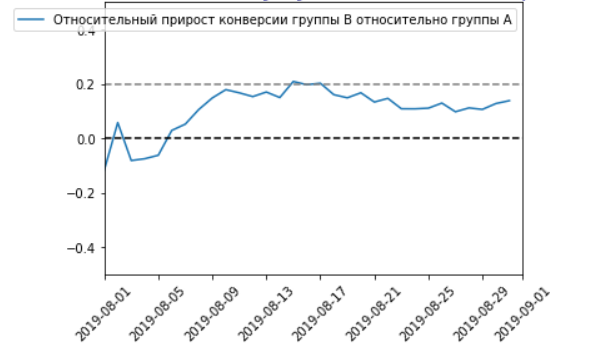


- по графику различия среднего чека сложно сделать выводы, т.к. он подвержен резким колебаниям.

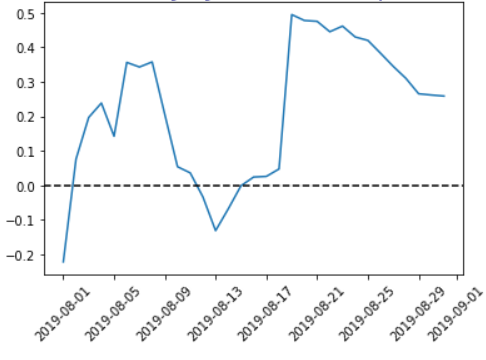

#### Решение по результататм A/B-теста:

Эксперимент можно признать успешным и завершить. Средний чек не изменился, но прирост конверсии в группе B составляет 17,3% по отношению к группе A. В целом, внедряемое изменение (Добавление формы подписки на все страницы сайта) и должно увеличивать число повторных покупок клиентов, т.к. позволяет магазину производить e-mail рассылки, направленные на возврат покупателей.